<a href="https://colab.research.google.com/github/martinpius/Applied-Predictive-Modeling2/blob/master/INTRO_TO_DEEP_LEARNING_REG_V_CLASSIFICATION_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are on colab with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n...Please Load Your Drive...")

def time_fmt(t):
  h = int(t / (60 * 60))
  m = int(t % (60 * 60 )/ 60)
  s = int(t % 60)
  return f"{h}: {m:>03}: {s:>05.2f}"

print(f"sample time: {time_fmt(123.5643)}")

Mounted at /content/drive
You are on colab with tensorflow version: 2.4.1
sample time: 0: 002: 03.00


In [ ]:
#We apply the simple multilayer perceptron on some real data to do predictions
#We start with the regression problem by predicting miles per gallon for different
#cars types based on the given covariates sets

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('max_rows', 6)
pd.set_option('max_columns', 0)
%matplotlib inline

In [ ]:
#Read the data from then url
dfm = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", na_values = ['NA','?'])

In [ ]:
#Check for any missing values
pd.isna(dfm).value_counts()

mpg    cylinders  displacement  horsepower  weight  acceleration  year   origin  name 
False  False      False         False       False   False         False  False   False    392
                                True        False   False         False  False   False      6
dtype: int64

In [ ]:
#Fill the missing values with for the horsepower with the median value
dfm['horsepower'] = dfm['horsepower'].fillna(dfm.horsepower.median())

In [ ]:
#check if the work is done
dfm.horsepower.isna().value_counts()

False    398
Name: horsepower, dtype: int64

In [ ]:
#Display the data (only 6 rows)
display(dfm)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
...,...,...,...,...,...,...,...,...,...
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [ ]:
#Drop the name column
dfm.drop(['name'], axis = 1, inplace = True)

In [ ]:
display(dfm)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
...,...,...,...,...,...,...,...,...
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


In [ ]:
#Feature engineering: We can compute speed like quantity using mpg and displacement
dfm['efficiency'] = dfm.apply(lambda x: x['displacement']/x['horsepower'], axis = 1)

In [ ]:
#Year and origin are categorical variables. We can get their dummies values:
dfm['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [ ]:
dfm['origin'].unique()

array([1, 3, 2])

In [ ]:
year_d = pd.get_dummies(dfm['year'], prefix = 'yr')
origin_d = pd.get_dummies(dfm['origin'], prefix = 'org')

In [ ]:
#Combine the dataset
dfm = pd.concat([dfm, year_d,origin], axis = 1)

In [ ]:
display(dfm)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,efficiency,yr_70,yr_71,yr_72,yr_73,yr_74,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,org_1,org_2,org_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,2.361538,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,2.121212,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,2.120000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,32.0,4,135.0,84.0,2295,11.6,82,1,1.607143,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,1.518987,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
397,31.0,4,119.0,82.0,2720,19.4,82,1,1.451220,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
#Drop year and origin columns

In [ ]:
dfm.drop(['year', 'origin'], axis = 1, inplace = True)

In [ ]:
#Rescale the continous columns to standerdize the values

In [ ]:
from scipy.stats import zscore

In [ ]:
columns = dfm[['mpg','cylinders','displacement','horsepower','weight','acceleration','efficiency']]

In [ ]:
for col in columns:
  dfm[col] = zscore(dfm[col])

In [ ]:
display(dfm)

,mpg,cylinders,displacement,horsepower,weight,acceleration,efficiency,yr_70,yr_71,yr_72,yr_73,yr_74,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,org_1,org_2,org_3
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,1.147548,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,0.672749,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,0.670354,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,-0.342869,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,-0.517033,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
397,0.958913,-0.856321,-0.714680,-0.584264,-0.296088,1.391285,-0.650918,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
target = dfm['mpg'].values

In [ ]:
x = dfm.drop(['mpg'], axis = 1).values

In [ ]:
print(f"target_shape: {target.shape}\nx_shape: {x.shape}")

target_shape: (398,)
x_shape: (398, 22)


In [ ]:
#Split the data into trainining validation sets:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.2)

In [ ]:
print(f"x_train_shape: {x_train.shape}, y_train_shape: {y_train.shape}:\nx_test_shape: {x_test.shape}, y_test_shape: {y_test.shape}")

x_train_shape: (318, 22), y_train_shape: (318,):
x_test_shape: (80, 22), y_test_shape: (80,)


In [ ]:
#We now building a simple MLP to train the regression model to predict mpg based on the selected features

In [ ]:
inputs = tf.keras.Input(shape = (22,), name = 'input_dim')
x = tf.keras.layers.Dense(units = 64, kernel_initializer = 'random_normal', activation = 'relu', name = 'dense1')(inputs)
x = tf.keras.layers.Dense(units = 32, kernel_initializer = 'random_normal', activation = 'relu', name = 'dense2')(x)
outputs = tf.keras.layers.Dense(units = 1, name = 'outputs')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'mlp_reg')

Model: "mlp_reg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_dim (InputLayer)       [(None, 22)]              0         
_________________________________________________________________
dense1 (Dense)               (None, 64)                1472      
_________________________________________________________________
dense2 (Dense)               (None, 32)                2080      
_________________________________________________________________
outputs (Dense)              (None, 1)                 33        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


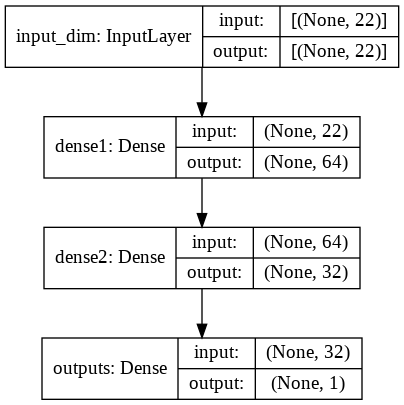

In [ ]:
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'mlp_reg.png', show_shapes = True)

In [ ]:
#Compile and fit the model on the above data:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')
model.fit(x_train, y_train, validation_split = 0.10, epochs = 15, batch_size = 64, verbose = 2)

Epoch 1/15
5/5 - 1s - loss: 0.9442 - val_loss: 0.5931
Epoch 2/15
5/5 - 0s - loss: 0.8117 - val_loss: 0.4901
Epoch 3/15
5/5 - 0s - loss: 0.6816 - val_loss: 0.3931
Epoch 4/15
5/5 - 0s - loss: 0.5401 - val_loss: 0.3150
Epoch 5/15
5/5 - 0s - loss: 0.4080 - val_loss: 0.2844
Epoch 6/15
5/5 - 0s - loss: 0.3232 - val_loss: 0.3204
Epoch 7/15
5/5 - 0s - loss: 0.2823 - val_loss: 0.3822
Epoch 8/15
5/5 - 0s - loss: 0.2711 - val_loss: 0.3998
Epoch 9/15
5/5 - 0s - loss: 0.2544 - val_loss: 0.3559
Epoch 10/15
5/5 - 0s - loss: 0.2307 - val_loss: 0.3010
Epoch 11/15
5/5 - 0s - loss: 0.2115 - val_loss: 0.2670
Epoch 12/15
5/5 - 0s - loss: 0.1937 - val_loss: 0.2502
Epoch 13/15
5/5 - 0s - loss: 0.1754 - val_loss: 0.2393
Epoch 14/15
5/5 - 0s - loss: 0.1600 - val_loss: 0.2264
Epoch 15/15
5/5 - 0s - loss: 0.1446 - val_loss: 0.2218


In [ ]:
#Predicting on the test set:
preds = model.predict(x_test)

In [ ]:
#Compute the evaluation metrics 
from sklearn.metrics import mean_squared_error
se_score = np.sqrt(mean_squared_error(preds, y_test))
print(f"The std_error for the model is: {se_score:.4f}")

The std_error for the model is: 0.3872


In [ ]:
#The classification problem (Logistic regression using MLP)

In [ ]:
dfm2 = pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv", na_values = ['NA', '?'])

In [ ]:
pd.isna(dfm2).value_counts()

id     job    area   income  aspect  subscriptions  dist_healthy  save_rate  dist_unhealthy  age    pop_dense  retail_dense  crime  product
False  False  False  False   False   False          False         False      False           False  False      False         False  False      1941
                     True    False   False          False         False      False           False  False      False         False  False        59
dtype: int64

In [ ]:
#There is no missing values

In [ ]:
display(dfm2)

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,1998,kl,d,28595.0,39.425000,3,7.168218,99,4.626950,36,0.759843,0.744094,0.098703,f
1998,1999,qp,c,67949.0,5.733333,0,8.936292,26,3.281439,46,0.909449,0.598425,0.117803,c
1999,2000,pe,c,61467.0,16.891667,0,4.312097,8,9.405648,48,0.925197,0.539370,0.451973,c


In [ ]:
#We want to predict product based on the other features

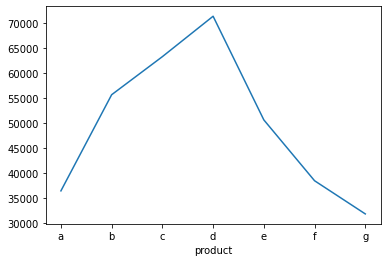

In [ ]:
#Data explorations:
#Group the data by product and get some stats:
dfm2.groupby('product').income.mean().plot()

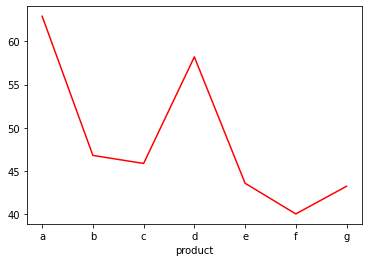

In [ ]:
dfm2.groupby('product').save_rate.mean().plot(kind = 'line', color = 'red')

In [ ]:
#Get the categorical variables and change into dummies:
job_cat = pd.get_dummies(dfm2['job'], prefix = 'job')
product_cat = pd.get_dummies(dfm2['product'], prefix = 'product')
area_cat = pd.get_dummies(dfm2['area'], prefix = 'area') 
subscription_cat = pd.get_dummies(dfm2['subscriptions'], prefix = 'subsc')

In [ ]:
target = product_cat.values

In [ ]:
#Drop ids, area, job, product and subscription columns
dfm2.drop(['product', 'area', 'subscriptions','job'], axis = 1, inplace = True)

In [ ]:
display(dfm2)

,id,income,aspect,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime
0,1,50876.0,13.100000,9.017895,35,11.738935,49,0.885827,0.492126,0.071100
1,2,60369.0,18.625000,7.766643,59,6.805396,51,0.874016,0.342520,0.400809
2,3,55126.0,34.766667,3.632069,6,13.671772,44,0.944882,0.724409,0.207723
...,...,...,...,...,...,...,...,...,...,...
1997,1998,28595.0,39.425000,7.168218,99,4.626950,36,0.759843,0.744094,0.098703
1998,1999,67949.0,5.733333,8.936292,26,3.281439,46,0.909449,0.598425,0.117803
1999,2000,61467.0,16.891667,4.312097,8,9.405648,48,0.925197,0.539370,0.451973


In [ ]:
dfm2.drop('id', axis = 1, inplace = True)

In [ ]:
dfm2['income'] = dfm2['income'].fillna(dfm2['income'].median())

In [ ]:
display(dfm2)

,income,aspect,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime
0,50876.0,13.100000,9.017895,35,11.738935,49,0.885827,0.492126,0.071100
1,60369.0,18.625000,7.766643,59,6.805396,51,0.874016,0.342520,0.400809
2,55126.0,34.766667,3.632069,6,13.671772,44,0.944882,0.724409,0.207723
...,...,...,...,...,...,...,...,...,...
1997,28595.0,39.425000,7.168218,99,4.626950,36,0.759843,0.744094,0.098703
1998,67949.0,5.733333,8.936292,26,3.281439,46,0.909449,0.598425,0.117803
1999,61467.0,16.891667,4.312097,8,9.405648,48,0.925197,0.539370,0.451973


In [ ]:
#Compute zscores for the continous  columns:
cols = dfm2.columns

In [ ]:
for col in cols:
  dfm2[col] = zscore(dfm2[col])

In [ ]:
display(dfm2)

,income,aspect,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime
0,-0.607550,-0.664918,-0.048411,-0.215764,-0.314089,0.854321,0.079279,-0.465765,-1.120315
1,0.338053,-0.207748,-0.266765,0.196869,-0.915161,1.394432,-0.075010,-1.445372,0.682945
2,-0.184205,1.127906,-0.988286,-0.714362,-0.078604,-0.495957,0.850727,1.055205,-0.373087
...,...,...,...,...,...,...,...,...,...
1997,-2.826971,1.513363,-0.371196,0.884591,-1.180569,-2.656402,-1.566477,1.184101,-0.969344
1998,1.093101,-1.274478,-0.062651,-0.370502,-1.344498,0.044154,0.387858,0.230272,-0.864885
1999,0.447425,-0.351174,-0.869615,-0.679976,-0.598362,0.584265,0.593578,-0.156415,0.962774


In [ ]:
#Combine the data with the computed dumies columns
dfm2 = pd.concat([dfm2, job_cat, subscription_cat,area_cat], axis = 1)

In [ ]:
display(dfm2)

,income,aspect,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,subsc_0,subsc_1,subsc_2,subsc_3,subsc_4,subsc_5,area_a,area_b,area_c,area_d
0,-0.607550,-0.664918,-0.048411,-0.215764,-0.314089,0.854321,0.079279,-0.465765,-1.120315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,0.338053,-0.207748,-0.266765,0.196869,-0.915161,1.394432,-0.075010,-1.445372,0.682945,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,-0.184205,1.127906,-0.988286,-0.714362,-0.078604,-0.495957,0.850727,1.055205,-0.373087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,-2.826971,1.513363,-0.371196,0.884591,-1.180569,-2.656402,-1.566477,1.184101,-0.969344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1998,1.093101,-1.274478,-0.062651,-0.370502,-1.344498,0.044154,0.387858,0.230272,-0.864885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1999,0.447425,-0.351174,-0.869615,-0.679976,-0.598362,0.584265,0.593578,-0.156415,0.962774,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
x = dfm2.values

In [ ]:
print(f"target_shape: {product_cat.shape}\nx_shape: {x.shape}")

target_shape: (2000, 7)
x_shape: (2000, 52)


In [ ]:
#We can split the data into training and validation set:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, product_cat, test_size = 0.2)

In [ ]:
print(f"x_train_shape {x_train.shape}, y_train_shape: {y_train.shape}\nx_test_shape: {x_test.shape}, y_test_shape: {y_test.shape}")

x_train_shape (1600, 52), y_train_shape: (1600, 7)
x_test_shape: (400, 52), y_test_shape: (400, 7)


Model: "mlp_class"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 52)]              0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               6784      
_________________________________________________________________
dense2 (Dense)               (None, 128)               16512     
_________________________________________________________________
dense3 (Dense)               (None, 32)                4128      
_________________________________________________________________
outputs (Dense)              (None, 7)                 231       
Total params: 27,655
Trainable params: 27,655
Non-trainable params: 0
_________________________________________________________________


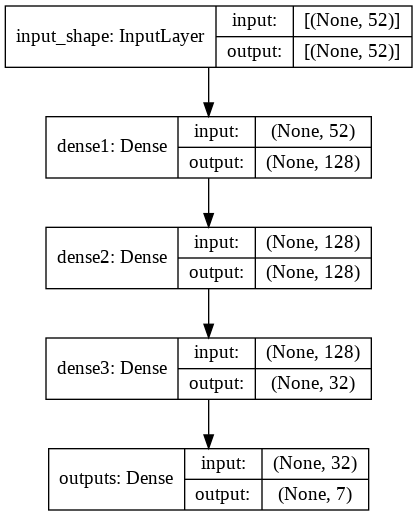

In [ ]:
# Build the classification model:
inputs = tf.keras.Input(shape = (52,), name = 'input_shape')
x = tf.keras.layers.Dense(units = 128, kernel_initializer = 'random_normal', activation = 'relu', name = 'dense1')(inputs)
x = tf.keras.layers.Dense(units = 128, kernel_initializer = 'random_normal', activation = 'relu', name = 'dense2')(x)
x = tf.keras.layers.Dense(units = 32, kernel_initializer = 'random_normal', activation = 'relu', name = 'dense3')(x)
outputs = tf.keras.layers.Dense(units = y_train.shape[1], activation = 'softmax', name = 'outputs')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'mlp_class')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'mlp_class.png', show_shapes = True)

In [ ]:
#Compile and fit the model on the above data

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
info = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 0, mode = 'auto',restore_best_weights = True)
model.fit(x_train, y_train, validation_data =(x_test, y_test), verbose = 2, epochs = 100, batch_size = 64, callbacks = [info])

Epoch 1/100
25/25 - 1s - loss: 0.5941 - accuracy: 0.7437 - val_loss: 0.6855 - val_accuracy: 0.7100
Epoch 2/100
25/25 - 0s - loss: 0.5763 - accuracy: 0.7538 - val_loss: 0.6804 - val_accuracy: 0.7125
Epoch 3/100
25/25 - 0s - loss: 0.5646 - accuracy: 0.7600 - val_loss: 0.7036 - val_accuracy: 0.7075
Epoch 4/100
25/25 - 0s - loss: 0.5544 - accuracy: 0.7588 - val_loss: 0.6793 - val_accuracy: 0.7125
Epoch 5/100
25/25 - 0s - loss: 0.5457 - accuracy: 0.7738 - val_loss: 0.6727 - val_accuracy: 0.7075
Epoch 6/100
25/25 - 0s - loss: 0.5383 - accuracy: 0.7656 - val_loss: 0.6897 - val_accuracy: 0.7150
Epoch 7/100
25/25 - 0s - loss: 0.5293 - accuracy: 0.7769 - val_loss: 0.6762 - val_accuracy: 0.7050
Epoch 8/100
25/25 - 0s - loss: 0.5275 - accuracy: 0.7681 - val_loss: 0.6803 - val_accuracy: 0.7100
Epoch 9/100
25/25 - 0s - loss: 0.5138 - accuracy: 0.7769 - val_loss: 0.6744 - val_accuracy: 0.7025
Epoch 10/100
25/25 - 0s - loss: 0.5125 - accuracy: 0.7806 - val_loss: 0.6992 - val_accuracy: 0.7025
